In [1]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
housing = pd.read_csv('bostonhousing.csv')
income_categories = housing['lstat'] // 2.5
income_categories[income_categories >= 5] = 5
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for training_indices,test_indices in split.split(housing,income_categories):
        stratified_train_set = housing.loc[training_indices]
        stratified_test_set = housing.loc[test_indices]
housing_features = stratified_train_set.drop('medv', axis=1)
housing_labels = stratified_train_set.medv.copy()
%run 'class.py.ipynb'
pipeline = Pipeline([('selector', ColumnSelector(list(housing_features))),
                                  ('standard_scaler', StandardScaler())
                                 ])

housing_transformed = pipeline.fit_transform(stratified_train_set)

In [3]:
def mean(a,b):
    return np.sqrt(mean_squared_error(a,b))

def crossva(a,b,c):
    p = cross_val_score(a,b,c,scoring='neg_mean_squared_error',cv=10)
    return np.mean(np.sqrt(-p))

In [4]:
from pyearth import Earth
mars = Earth()

In [12]:
X = mars.fit(housing_transformed,housing_labels)
housing_predictions = mars.predict(housing_transformed)
a1=mean(housing_labels,housing_predictions)
b1=r2_score(housing_labels,housing_predictions)
c1=crossva(mars, housing_transformed, housing_labels)
print("mean_square_error : {}".format(a1))
print("r2_score : {}".format(b1))
print("crossvalidation_score : {}".format(c1))

mean_square_error : 3.212111192868279
r2_score : 0.8759488967393532
crossvalidation_score : 3.8321241131604795


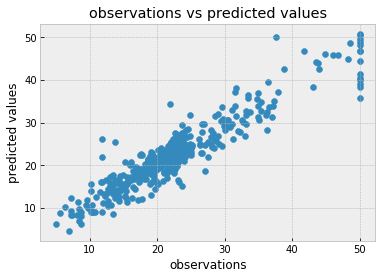

In [9]:
x = mars.fit(housing_transformed,housing_labels)
a = mars.predict(housing_transformed)
plt.scatter(housing_labels, a)
plt.xlabel('observations')
plt.ylabel('predicted values')
plt.title('observations vs predicted values')

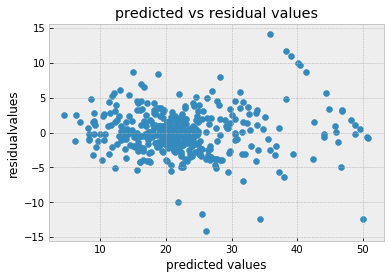

In [10]:
b = housing_labels-mars.predict(housing_transformed)
plt.scatter(a, b)
plt.xlabel('predicted values')
plt.ylabel('residualvalues')
plt.title('predicted vs residual values')